In [61]:
!pip install xgboost
!pip install tensorflow
!pip install missingno


In [1]:
#U ovom zadatku fokusirat ću se na izradu regresijskog modela koji će predviđati težinu osobe u kilogramima
#na temelju različitih demografskih, prehrambenih i životnih faktora.
#Model će koristiti skup podataka koji sadrži informacije o 
#spolu, dobi, tjelesnoj visini, prehrambenim navikama, učestalosti tjelesne aktivnosti, načinu prijevoza 
#te drugim faktorima koji mogu utjecati na tjelesnu masu.

#Podaci uključuju sljedeće varijable:
#Gender – Spol osobe (Muški/Ženski).
#Age – Dob osobe u godinama.
#Height – Visina osobe u metrima.
#Weight – Težina osobe u kilogramima (ciljna varijabla).
#family_history_with_overweight – Ima li osoba obiteljsku povijest prekomjerne tjelesne težine (Da/Ne).
#FAVC – Konzumira li osoba često visokokaloričnu hranu (Da/Ne).
#FCVC – Učestalost konzumacije povrća (skala od 1 do 3).
#NCP – Broj glavnih obroka dnevno.
#CAEC – Učestalost konzumacije hrane između obroka (Nikada, Ponekad, Često, Uvijek).
#SMOKE – Puši li osoba (Da/Ne).
#CH2O – Dnevni unos vode (skala od 1 do 3).
#SCC – Prati li osoba unos kalorija (Da/Ne).
#FAF – Učestalost tjelesne aktivnosti (skala od 0 do 3).
#TUE – Vrijeme provedeno korištenjem tehnologije (skala od 0 do 3).
#CALC – Učestalost konzumacije alkohola (Nikada, Ponekad, Često, Uvijek).
#MTRANS – Glavni način prijevoza (Automobil, Bicikl, Motor, Javni prijevoz, Pješice).

#koristit ću se modelima:
#Linearna regresija
#K-Nearest Neighbors regresija (KNN)
#Stabla odluke (Decision Tree)
#Random Forest regresija
#xgboost

import pandas as pd
data = pd.read_csv("obesity.csv");
data.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [39]:
#vizualni pregled podataka
print(f"Redovi i stupci: {data.shape}")
print(f"Naziv stupaca: {data.columns}")
print("Tipovi podataka:")
print(f"{data.info()}")


Redovi i stupci: (2111, 17)
Naziv stupaca: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Tipovi podataka:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int8   
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int8   
 5   FAVC                            2111 non-null   int8   
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CA

In [41]:
print("Opis vrijednosti podataka:")
data.describe()

Opis vrijednosti podataka:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701620,86.586035,0.817622,0.883941,2.418986,2.685651,1.859308,0.020843,2.008053,0.045476,1.010313,0.657861,2.268593,2.365230
std,0.500083,6.357078,0.093368,26.191163,0.386247,0.320371,0.533996,0.778079,0.468543,0.142893,0.612950,0.208395,0.850613,0.608926,0.515498,1.261423
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,2.660000,2.000000,0.000000,1.585000,0.000000,0.125000,0.000000,2.000000,3.000000
50%,1.000000,23.000000,1.700000,83.000000,1.000000,1.000000,2.390000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625000,2.000000,3.000000
75%,1.000000,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.480000,0.000000,1.670000,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [53]:
duplicate_values = data[data.duplicated(keep=False)]
duplicate_values.head(10)
#iako imamo duplikate ja bi ih ostavio jer je veoma lako moguce da imamo različite osobe sa istim vrijednostima

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,0,21,1.52,42.0,0,0,3.0,1.0,1,0,1.0,0,0.0,0.0,2,3,Insufficient_Weight
98,0,21,1.52,42.0,0,0,3.0,1.0,1,0,1.0,0,0.0,0.0,2,3,Insufficient_Weight
105,0,25,1.57,55.0,0,1,2.0,1.0,2,0,2.0,0,2.0,0.0,2,3,Normal_Weight
106,0,25,1.57,55.0,0,1,2.0,1.0,2,0,2.0,0,2.0,0.0,2,3,Normal_Weight
145,1,21,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,Overweight_Level_I
174,1,21,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,Overweight_Level_I
179,1,21,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,Overweight_Level_I
184,1,21,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,Overweight_Level_I
208,0,22,1.69,65.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,2,3,Normal_Weight
209,0,22,1.69,65.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,2,3,Normal_Weight


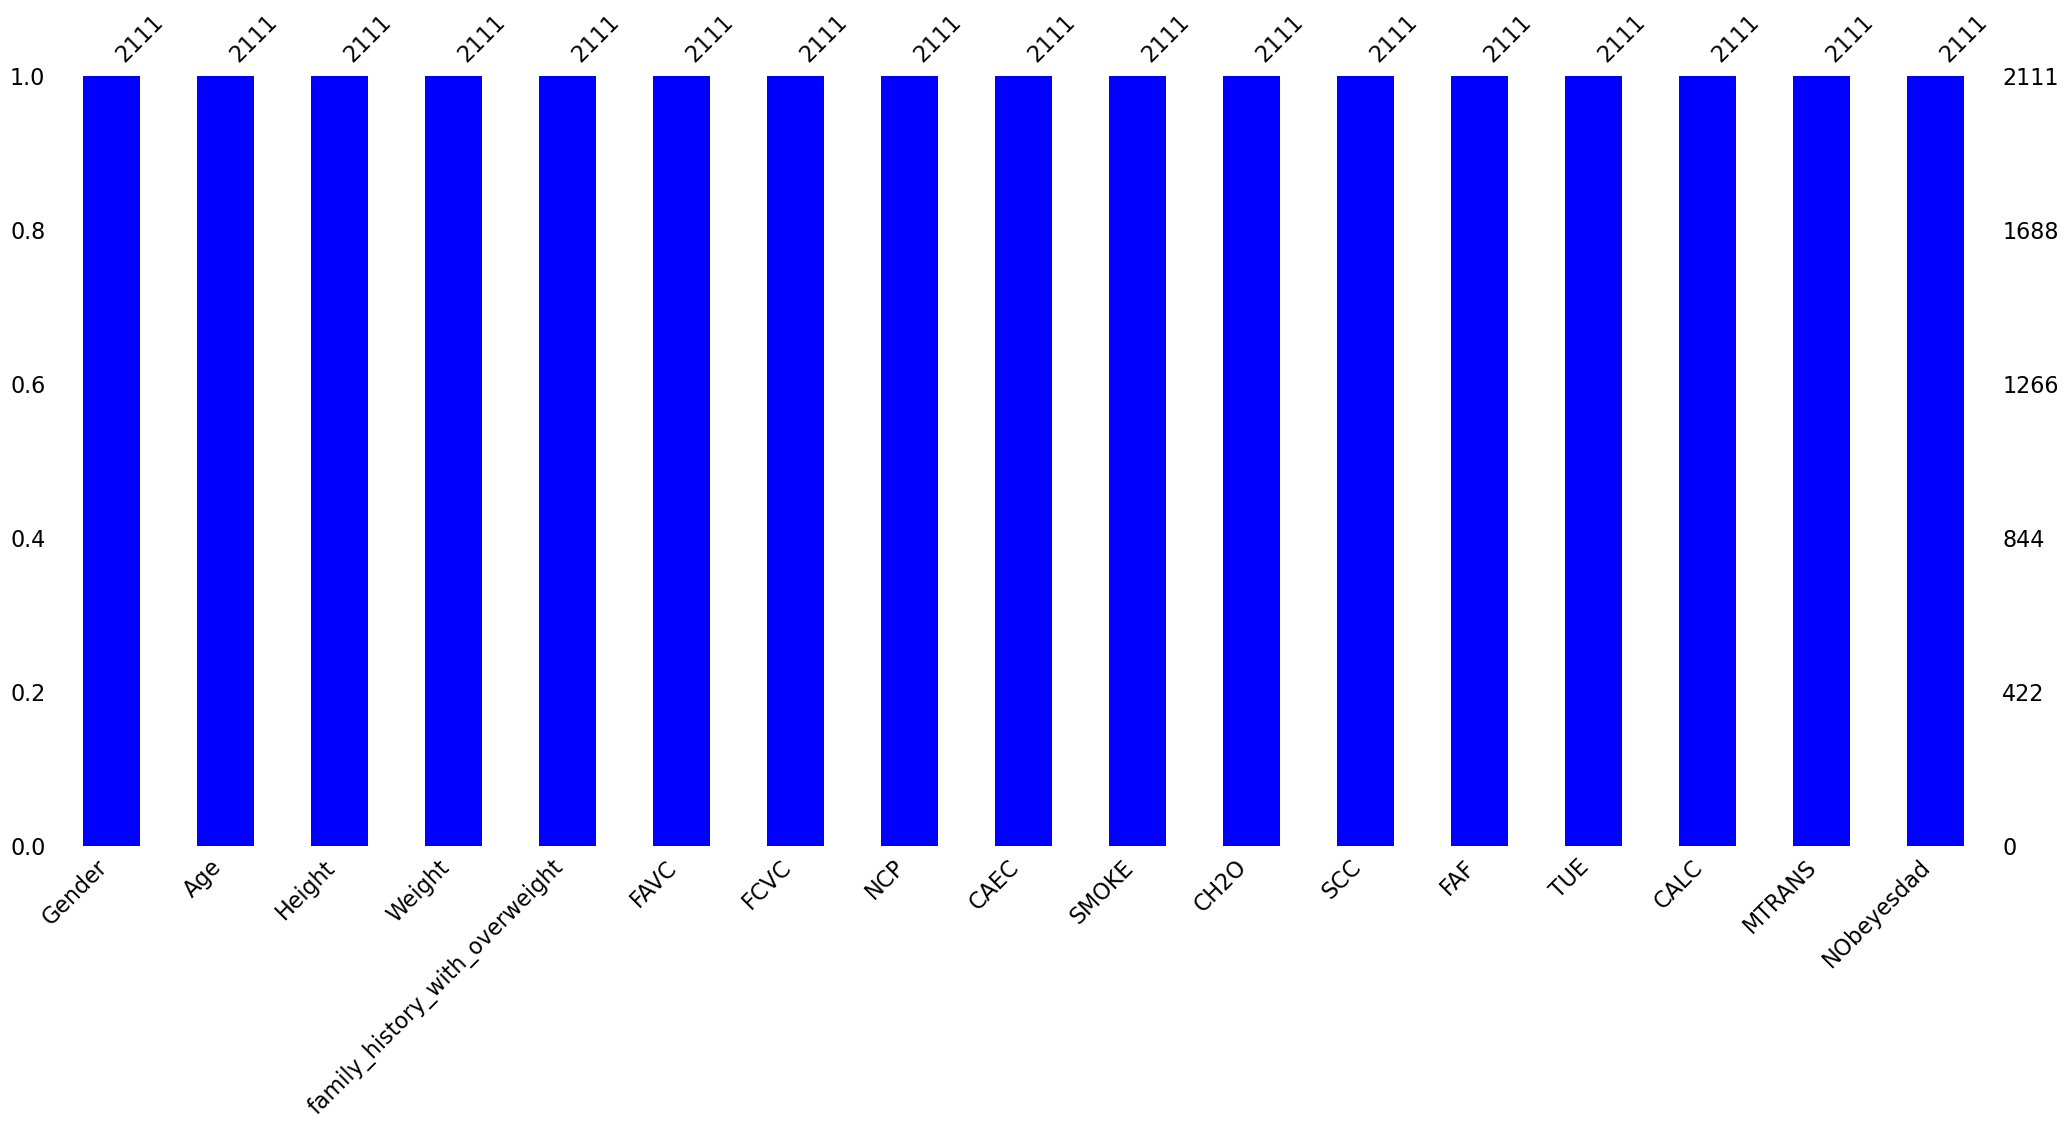

In [63]:
import missingno
missingno.bar(data, color = "b")
plt.show()
#nemamo kolona sa null vrijednostima  sto mozemo vidjeti i na grafu

In [73]:
#ovdje sam odabrao stupce koje treba pretvoriti iz vrijednosti tipa M ili Ž u brojčanu vrijednost
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for cat in categorical_columns:
    data[cat] = data[cat].astype('category').cat.codes
numerical_columns = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
#kombinacija kategorijskih i numerickih stupaca
inputs = [data[numerical_columns], data[categorical_columns]];
X = pd.concat(inputs, axis=1)
y = data['Weight']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# KNN algoritam racuna udaljenosti izmedju susjeda 
# u našem data setu imamo vrijednosti poput Godine, visina, kilaža od kojih svaki ima različitu skalu i mjernu jedinicu
# kako npr godine imaju značajno veći raspon od recimo visine(jer je visina u metrima) one bi utjecale na algoritam puno više od visine
# !!a visina je vjerovatno bitnije od godina!!
##zbog toga je potrebno naše podatke scaleati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


#Kako bi smo otkrili optimalnu vrijednost k hiper parametra testirat cemo predikcije u rasponu od 3 do 21
#preskacemo 1 i 2 kako bi smo izbjegli pretreniranost
knn_models={};
k_values = range(3, 21)
#treniranje modela
print("Treniranje modela u toku...")
for k in k_values:
    print(f"Treniram model sa k={k}")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_models[k]=knn;
print("Treniranje završeno...")



Treniranje modela u toku...
Treniram model sa k=3
Treniram model sa k=4
Treniram model sa k=5
Treniram model sa k=6
Treniram model sa k=7
Treniram model sa k=8
Treniram model sa k=9
Treniram model sa k=10
Treniram model sa k=11
Treniram model sa k=12
Treniram model sa k=13
Treniram model sa k=14
Treniram model sa k=15
Treniram model sa k=16
Treniram model sa k=17
Treniram model sa k=18
Treniram model sa k=19
Treniram model sa k=20
Treniranje završeno...


Optimalan hiperparametar  n_neighbords je: 4 sa R² score-om: 0.84
Ostale vrijednosti su: [0.8371457590709435, 0.837531376934855, 0.8324320351967436, 0.831924623383547, 0.8251015746758156, 0.8195834756144634, 0.8151911558207255, 0.8133082381812, 0.8096979796760146, 0.8088817498108076, 0.8096096195688118, 0.8029998846524766, 0.7956209626231565, 0.7893888951698401, 0.788777882167405, 0.7860987069389529, 0.7821129473248759, 0.7774759500729315]


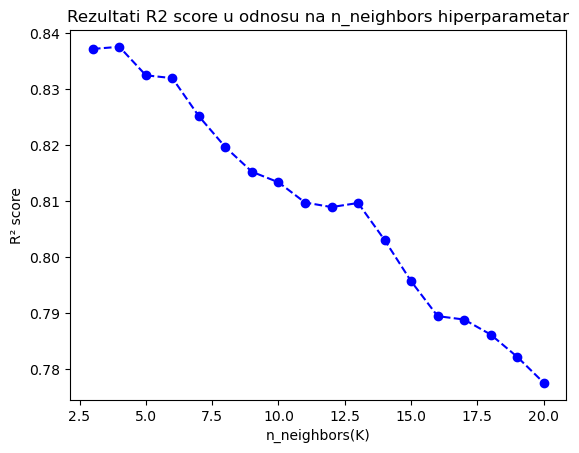

In [17]:
#u varijabli knn_scores cuvamo rezultate predikcija za sve modele
knn_scores = []
for k in k_values:
    knn = knn_models[k]
    y_pred = knn.predict(X_test_scaled)
    knn_scores.append(r2_score(y_test, y_pred))

best_k = k_values[np.argmax(knn_scores)]
best_r2 = max(knn_scores)
print(f"Optimalan hiperparametar  n_neighbords je: {best_k} sa R² score-om: {best_r2:.2f}")
print(f"Ostale vrijednosti su: {knn_scores}")

# Da to prikazemo u na grafu
plt.plot(k_values, knn_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('n_neighbors(K)')
plt.ylabel('R² score')
plt.title('Rezultati R2 score u odnosu na n_neighbors hiperparametar')
plt.show()


In [19]:
estimators_range = range(20, 201, 10)  # Testiramo od 20 do 200 estimatorsa u koracima od 10
rf_models={}
for n in estimators_range:
    print(f"Treniram RandomForestRegressor sa n_estimators:{n}")
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_models[n]=rf;
    

Treniram RandomForestRegressor sa n_estimators:20
Treniram RandomForestRegressor sa n_estimators:30
Treniram RandomForestRegressor sa n_estimators:40
Treniram RandomForestRegressor sa n_estimators:50
Treniram RandomForestRegressor sa n_estimators:60
Treniram RandomForestRegressor sa n_estimators:70
Treniram RandomForestRegressor sa n_estimators:80
Treniram RandomForestRegressor sa n_estimators:90
Treniram RandomForestRegressor sa n_estimators:100
Treniram RandomForestRegressor sa n_estimators:110
Treniram RandomForestRegressor sa n_estimators:120
Treniram RandomForestRegressor sa n_estimators:130
Treniram RandomForestRegressor sa n_estimators:140
Treniram RandomForestRegressor sa n_estimators:150
Treniram RandomForestRegressor sa n_estimators:160
Treniram RandomForestRegressor sa n_estimators:170
Treniram RandomForestRegressor sa n_estimators:180
Treniram RandomForestRegressor sa n_estimators:190
Treniram RandomForestRegressor sa n_estimators:200


Najbolji n_estimators za Random Forest: 200 sa R² score: 0.91


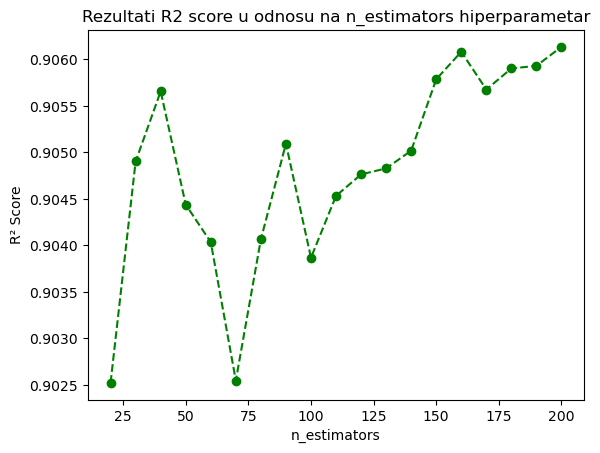

In [23]:
rf_scores = []
for n in estimators_range:
    y_pred = rf_models[n].predict(X_test_scaled)
    rf_scores.append(r2_score(y_test, y_pred))

# Pronalazak najboljeg n_estimators
best_n_estimators = estimators_range[np.argmax(rf_scores)]
best_rf_r2 = max(rf_scores)
print(f"Najbolji n_estimators za Random Forest: {best_n_estimators} sa R² score: {best_rf_r2:.2f}")

# Plotovanje rezultata
plt.plot(estimators_range, rf_scores, marker='o', linestyle='dashed', color='g')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.title('Rezultati R2 score u odnosu na n_estimators hiperparametar')
plt.show()

In [25]:
#objedinjujemo modele zbog lakseg testiranja
models = {
    "Linearna regresija": LinearRegression(),
    f"KNN - {best_k}": KNeighborsRegressor(n_neighbors=best_k),
    "Stablo odluke": DecisionTreeRegressor(random_state=42),
    "Šuma": RandomForestRegressor(n_estimators=best_n_estimators, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}


Linearna regresija rezultati:
  MAE: 14.15
  MSE: 309.46
  R^2 Score: 0.56

KNN - 4 rezultati:
  MAE: 5.92
  MSE: 114.56
  R^2 Score: 0.84

Stablo odluke rezultati:
  MAE: 6.39
  MSE: 148.76
  R^2 Score: 0.79

Šuma rezultati:
  MAE: 5.01
  MSE: 66.19
  R^2 Score: 0.91

XGBoost rezultati:
  MAE: 6.05
  MSE: 82.56
  R^2 Score: 0.88



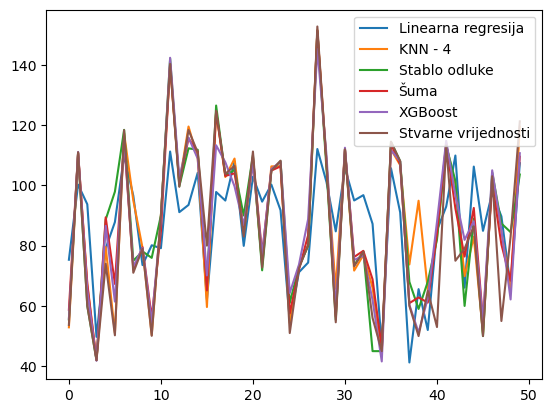

In [27]:

#zajednicki graf
data_count=50
result_data={}
#treniranje modela
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Koristimo scaleane podatke -- opisano gore u textu
    y_pred = model.predict(X_test_scaled)
    print(f"{name} rezultati:")
    print(f"  MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"  R^2 Score: {r2_score(y_test, y_pred):.2f}\n")
    result_data[name]=y_pred[:data_count];
#print(result_data)
result_data["Stvarne vrijednosti"]=y_test.values[:data_count];
graph = pd.DataFrame(result_data).plot.line()

In [280]:
# ZAKLJUČCI
#Linearna regresija
#MAE: 14.15 → Prosječna greška predviđanja je oko 14.15 kg.
#MSE: 309.46 → Velika srednja kvadratna greška znači da postoje značajne razlike između stvarnih i predviđenih vrijednosti.
#R² Score: 0.56 → Model pogadja samo 56%, što znači da nije baš dobar.
#Linearna regresija se ne nosi dobro s ovim podacima, vjerovatno jer relacija između varijabli nije linearna.

#KNN
#MAE: 5.92 → Prosječna greška je 5.92 kg, što je znatno bolje od linearne regresije.
#R² Score: 0.84 → Model pogadja 84%, što je odlično!
#KNN daje jako dobre rezultate

#Stablo odluke
#MAE: 6.39 → Slično kao kod KNN, ali malo lošije.
#R² Score: 0.79 → Model pogadja 79%, što je i dalje dobro, ali slabije od KNN-a.

# Šuma
#MAE: 5.01
#R^2 Score: 0.91
#Izuzetno dobri rezultati ali moze doci do prenaučenosti i smanjene generalizacije modela


#KNN model je jako dobar, ali može patiti od prenaučenosti, što znači da lošije generalizuje podatke.
#isto vrijedi i za sumu

#Ja bih ovdje odabrao XGBoost jer sam procitao da on  
#radi složenije optimizacije koje mogu sprečiti pretreniranost, pa može davati realističnije rezultate.



In [282]:
#NEURONSKE MREŽE
# Postavljanje modela
data.Weight.describe()

count    2111.000000
mean       86.586035
std        26.191163
min        39.000000
25%        65.470000
50%        83.000000
75%       107.430000
max       173.000000
Name: Weight, dtype: float64

In [364]:
import keras
from keras.models import Sequential
from keras.layers import Dense

scalerMinMax = MinMaxScaler()
X_train_scaled_min_max = scalerMinMax.fit_transform(X_train)
X_test_scaled_min_max = scalerMinMax.transform(X_test)

#automatska klakulacija ulaznih varijabi iz X trening skupa
numberOfInputs = X_train_scaled.shape[1] 

#kako bih izbjegao upozorenje slicno kao i na vjezbama pronasao sam da mozemo ovako definirati ulazni sloj i izbjeci warning
inputLayer = keras.Input(shape=(numberOfInputs,))
model_skalirani_standard = keras.Sequential([
    inputLayer, 
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Izlaz ostavljamo linearni jer je u pitanju regresija
])

model_skalirani_min_max = keras.Sequential([
    inputLayer, 
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Dropout sloj sa 20% isključenih neurona kako bi smanjili overfitting
    layers.Dense(64, activation='relu'),

    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Izlaz ostavljamo linearni jer je u pitanju regresija
])

model_bez_skaliranja = keras.Sequential([
    inputLayer, 
    layers.Dense(8, activation='tanh'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1)  # Izlaz ostavljamo linearni jer je u pitanju regresija
])

print("*****************TRENIRANJE MODELA BEZ SKALIRANJA*****************")
model_bez_skaliranja.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_bez_skaliranja.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

print("*****************TRENIRANJE MODELA SA STANDARD SKALEROM*****************")
model_skalirani_standard.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_skalirani_standard.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2)

print("*****************TRENIRANJE MODELA SA MIN MAX SKALEROM*****************")
model_skalirani_min_max.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_skalirani_min_max.fit(X_train_scaled_min_max, y_train, epochs=50, batch_size=32, validation_split=0.2)


*****************TRENIRANJE MODELA BEZ SKALIRANJA*****************
Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8100.2271 - mae: 86.3282 - val_loss: 8680.0059 - val_mae: 89.2881
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8017.2373 - mae: 85.7738 - val_loss: 8678.0439 - val_mae: 89.2771
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7976.4229 - mae: 85.5029 - val_loss: 8676.0811 - val_mae: 89.2661
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8158.4521 - mae: 86.6310 - val_loss: 8674.1133 - val_mae: 89.2551
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7947.6104 - mae: 85.3531 - val_loss: 8672.1572 - val_mae: 89.2441
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7999.0859 - mae: 85.7303 - val_loss: 8670.1934 - val_mae: 89.2331
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8087.9927 - mae: 86.1135 - val_loss: 8668.2305 - val_mae: 89.2221
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 784

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Rezultat za: Bez skaliranja
  MAE: 86.21
  MSE: 8136.88
  R^2 Score: -10.54

Rezultat za: Standard Scaler
  MAE: 11.33
  MSE: 217.55
  R^2 Score: 0.69

Rezultat za: MinMax Scaler
  MAE: 11.98
  MSE: 212.77
  R^2 Score: 0.70



<Axes: >

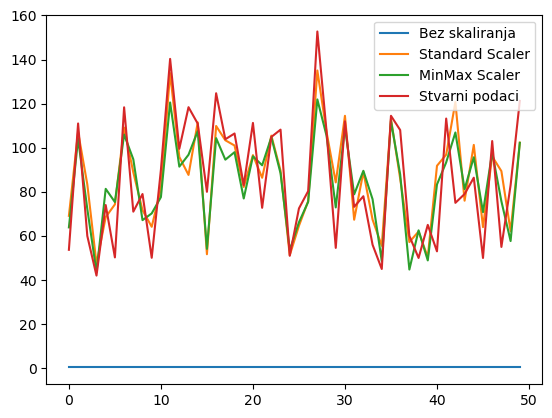

In [366]:
# Predictions with Neural Network
y_pred_bez_skaliranja = model_bez_skaliranja.predict(X_test).flatten()
y_pred_standard = model_skalirani_standard.predict(X_test_scaled).flatten()
y_pred_min_max = model_skalirani_min_max.predict(X_test_scaled_min_max).flatten()


rezultati = {
    "Bez skaliranja": y_pred_bez_skaliranja,
    "Standard Scaler": y_pred_standard,
    "MinMax Scaler": y_pred_min_max,
}
data_count = 50;
nnresult_data={}
for name, result  in rezultati.items():
    print(f"Rezultat za: {name}")
    print(f"  MAE: {mean_absolute_error(y_test, result):.2f}")
    print(f"  MSE: {mean_squared_error(y_test, result):.2f}")
    print(f"  R^2 Score: {r2_score(y_test, result):.2f}\n")
    nnresult_data[name]=result[:data_count];

nnresult_data["Stvarni podaci"]=y_test.values[:data_count];
pd.DataFrame(nnresult_data).plot.line()